# Redes Neuronales
# Ejemplos Varios<a class="tocSkip">
## Reconocimiento de Patrones <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

---

# Ejemplo de Uso de Redes Neuronales

En estos ejemplos se muestra cómo hacer una red neuornal desde cero y cómo entrenar una red neuronal usando sklearn.




# Setup inicial

Liberías necesarias para que funcione el algoritmo.

## Setup de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from   sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from   IPython.display import clear_output


## Carga de base de datos

En estos ejemplos usaremos las siguientes bases de datos de características para probar clasificadores:


* F2:  Training data: 800 samples with 2 features. Testing data: 400 samples with 2 features. Classes: 0...1

* G2: Training data: 800 samples with 2 features
 Testing data: 200 samples with 2 features. Classes: 1...2

* G3: Training data: 1200 samples with 2 features. Testing data: 600 samples with 2 features. Classes: 1...3

* G4: Training data: 800 samples with 2 features .Testing data: 400 samples with 2 features. Classes: 1...4

* P2: Training data: 1052 samples with 2 features. Testing data: 262 samples with 2 features. Classes: 0...1



In [ ]:
!wget https://www.dropbox.com/s/4knnagipqowhn7s/F2.zip?dl=0
!unzip F2

!wget https://www.dropbox.com/s/l7nvckkpl821b0q/G2.zip?dl=0
!unzip G2

!wget https://www.dropbox.com/s/wnm9zcfz9fd0g6e/G3.zip?dl=0
!unzip G3

!wget https://www.dropbox.com/s/3r634emj92o0tyy/G4.zip?dl=0
!unzip G4

!wget https://www.dropbox.com/s/q5dqgrlzj8cbc8p/P2.zip?dl=0
!unzip P2


clear_output()

print('Datos F2, G2 G3, G4 y P2 cargados.')


Datos F2, F40, G3, G4 y P2 cargadas.


## Funciones necesarias

In [2]:
def load_features(prefix):
    Xtrain  = np.load(prefix+'_Xtrain.npy')            # training samples
    Xtest = np.load(prefix+'_Xtest.npy')             # testing samples
    ytrain  = np.ravel(np.load(prefix+'_dtrain.npy'))  # training labels
    ytest = np.ravel(np.load(prefix+'_dtest.npy'))   # testing labels
    print('Training data: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
    print(' Testing data: '+str(Xtest.shape[0])+' samples with '+str(Xtest.shape[1])+' features')
    print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
    return Xtrain,ytrain,Xtest,ytest

def print_confusion(dt,ds,show_heatmap=0,Cnorm=1):
    # dt - true, ds - predicted
    C   = confusion_matrix(dt,ds) 
    print('Confusion Matrix:')
    print(C)
    acc = accuracy_score(dt,ds) 
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    if show_heatmap:
      sns.heatmap(C/Cnorm, annot=True, cbar=None, cmap="Blues")
      plt.title("Confusion Matrix"), plt.tight_layout()
      plt.ylabel("True Class"), plt.xlabel("Predicted Class")
      plt.show()

def plot_features(X,d,st,show=1):
    dmin = int(np.min(d)) 
    dmax = int(np.max(d)) 
    #colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    #colors = 'Greens'
    for j in range(dmin,dmax+1):
        plt.scatter(X[d==j,0],X[d==j,1],label=str(j),s=27)
    plt.grid(True)
    plt.legend()
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$x_2$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()

def plot_decision_lines(clf,X,show=0,decisionline=1):
    # based on example of https://scikit-learn.org
    h = 0.075
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if decisionline == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Reds, alpha=0.8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if show==1:
        plt.show()

def show_clf_results(clf,X,d,Xt,dt,d0,ds,st,decisionline=1):
    gs = gridspec.GridSpec(1, 2)
    fig = plt.figure(figsize=(18, 6))
    print('Training:')
    acc = accuracy_score(d,d0) 
    accst = f'Acc = {acc:.4f}'    
    ax = plt.subplot(gs[0,0])
    print_confusion(d,d0)                             # confusion matrix in training
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(X,d,st+' - Training: '+accst,0)     # feature space in training   
    ax = plt.subplot(gs[0,1])
    print('Testing:')
    acc = accuracy_score(ds,dt) 
    accst = f'Acc = {acc:.4f}'    
    print_confusion(dt,ds)                            # confusion matrix in testing
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(Xt,dt,st+' - Testing: '+accst,1)    # feature space in testing


def plot_loss(loss_train):
    plt.figure(figsize=[8,6])
    plt.plot(loss_train,'r',linewidth=1.5)
    # plt.plot(loss_val,'b',linewidth=1.5)
    # plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
    plt.xlabel('Epochs ',fontsize=14)
    plt.ylabel('Loss',fontsize=14)
    plt.title('Training Loss',fontsize=14)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.xlim(0,xmax)
    plt.ylim(0,ymax)
    plt.grid(True)
    plt.show()


# Training/Testing Data

Cargando G4...
Training data: 800 samples with 2 features
 Testing data: 400 samples with 2 features
      Classes: 1...4


findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


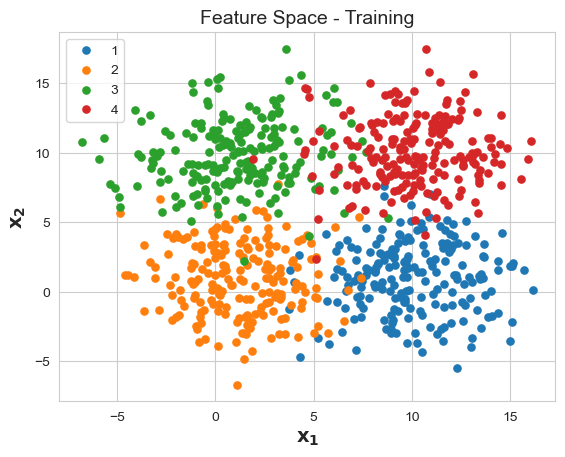

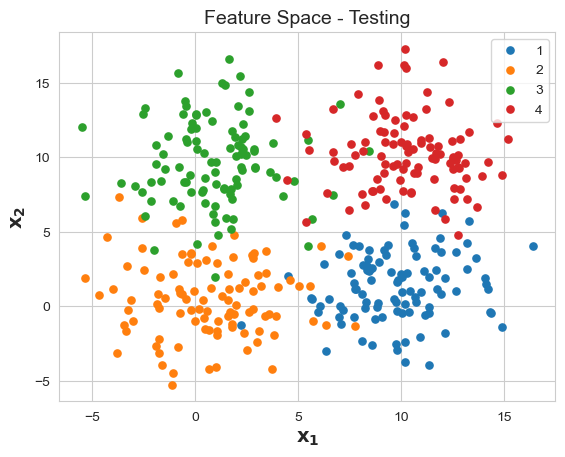

In [3]:
data = 'G4' # <= puede ser 'G2','G3','G4','P2','F2' (ver explicación más arriba)
print('Cargando '+data+'...')

Xtrain,ytrain,Xtest,ytest   = load_features(data + '/' + data)   # load training and testing data

plot_features(Xtrain,ytrain,'Training')
plot_features(Xtest,ytest,'Testing')


# Logistic Regression (sklearn)

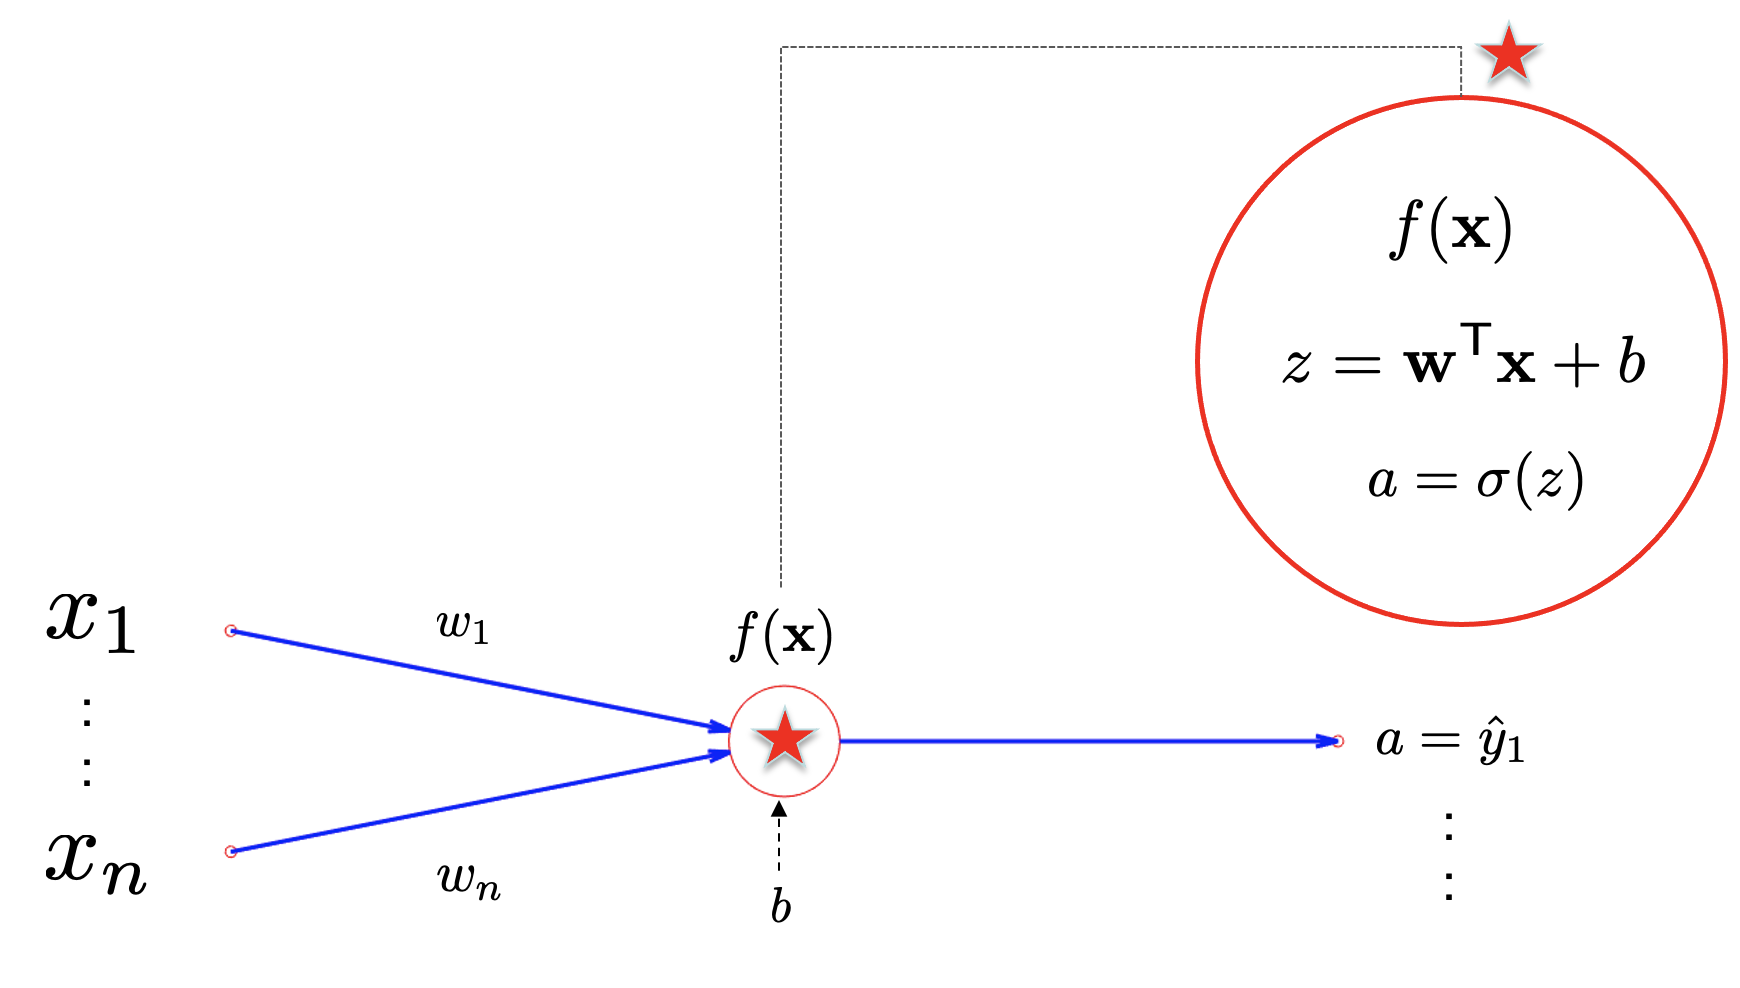

Training:
Confusion Matrix:
[[189   7   0   4]
 [  6 187   6   1]
 [  1   4 183  12]
 [  4   2  10 184]]
Accuracy = 92.88
Testing:
Confusion Matrix:
[[95  2  0  3]
 [ 5 92  3  0]
 [ 0  6 91  3]
 [ 1  0  5 94]]
Accuracy = 93.00


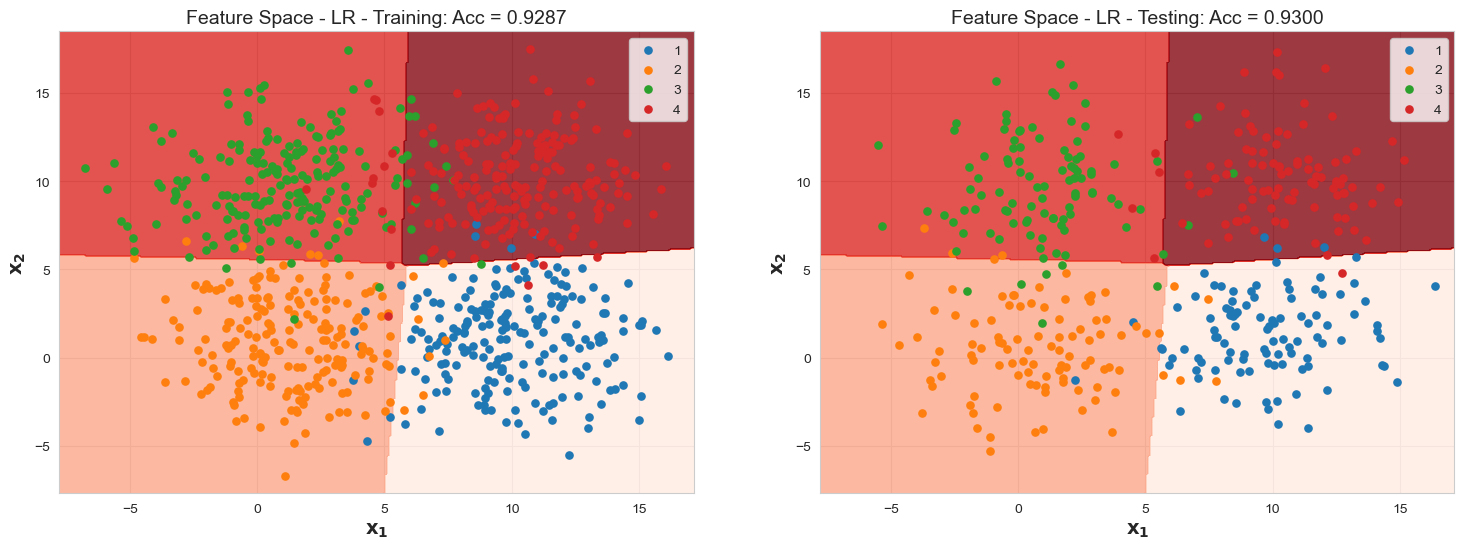

In [4]:
from sklearn.linear_model import LogisticRegression
# Training
clf = LogisticRegression(C=0.1,solver="lbfgs")

clf.fit(Xtrain, ytrain)

# Evaluation on training subset 
y0  = clf.predict(Xtrain)
    
# Evaluation on testing subset 
ypred  = clf.predict(Xtest)

# Display results 
show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,'LR',decisionline=1)



# Redes Neuronales

En este ejemplo, entrenaremos una red neuoronal como la que se muestra en la figura: 2 características de entrada ($x_1,x_2$), 3 capas (2 ocultas ${\bf a}_1$ de 6 nodos, y ${\bf a}_2$ de 12 nodos), y una salida de 4 elementos, es decir 4 clases, tal cual como tiene la base de datos `G4`.

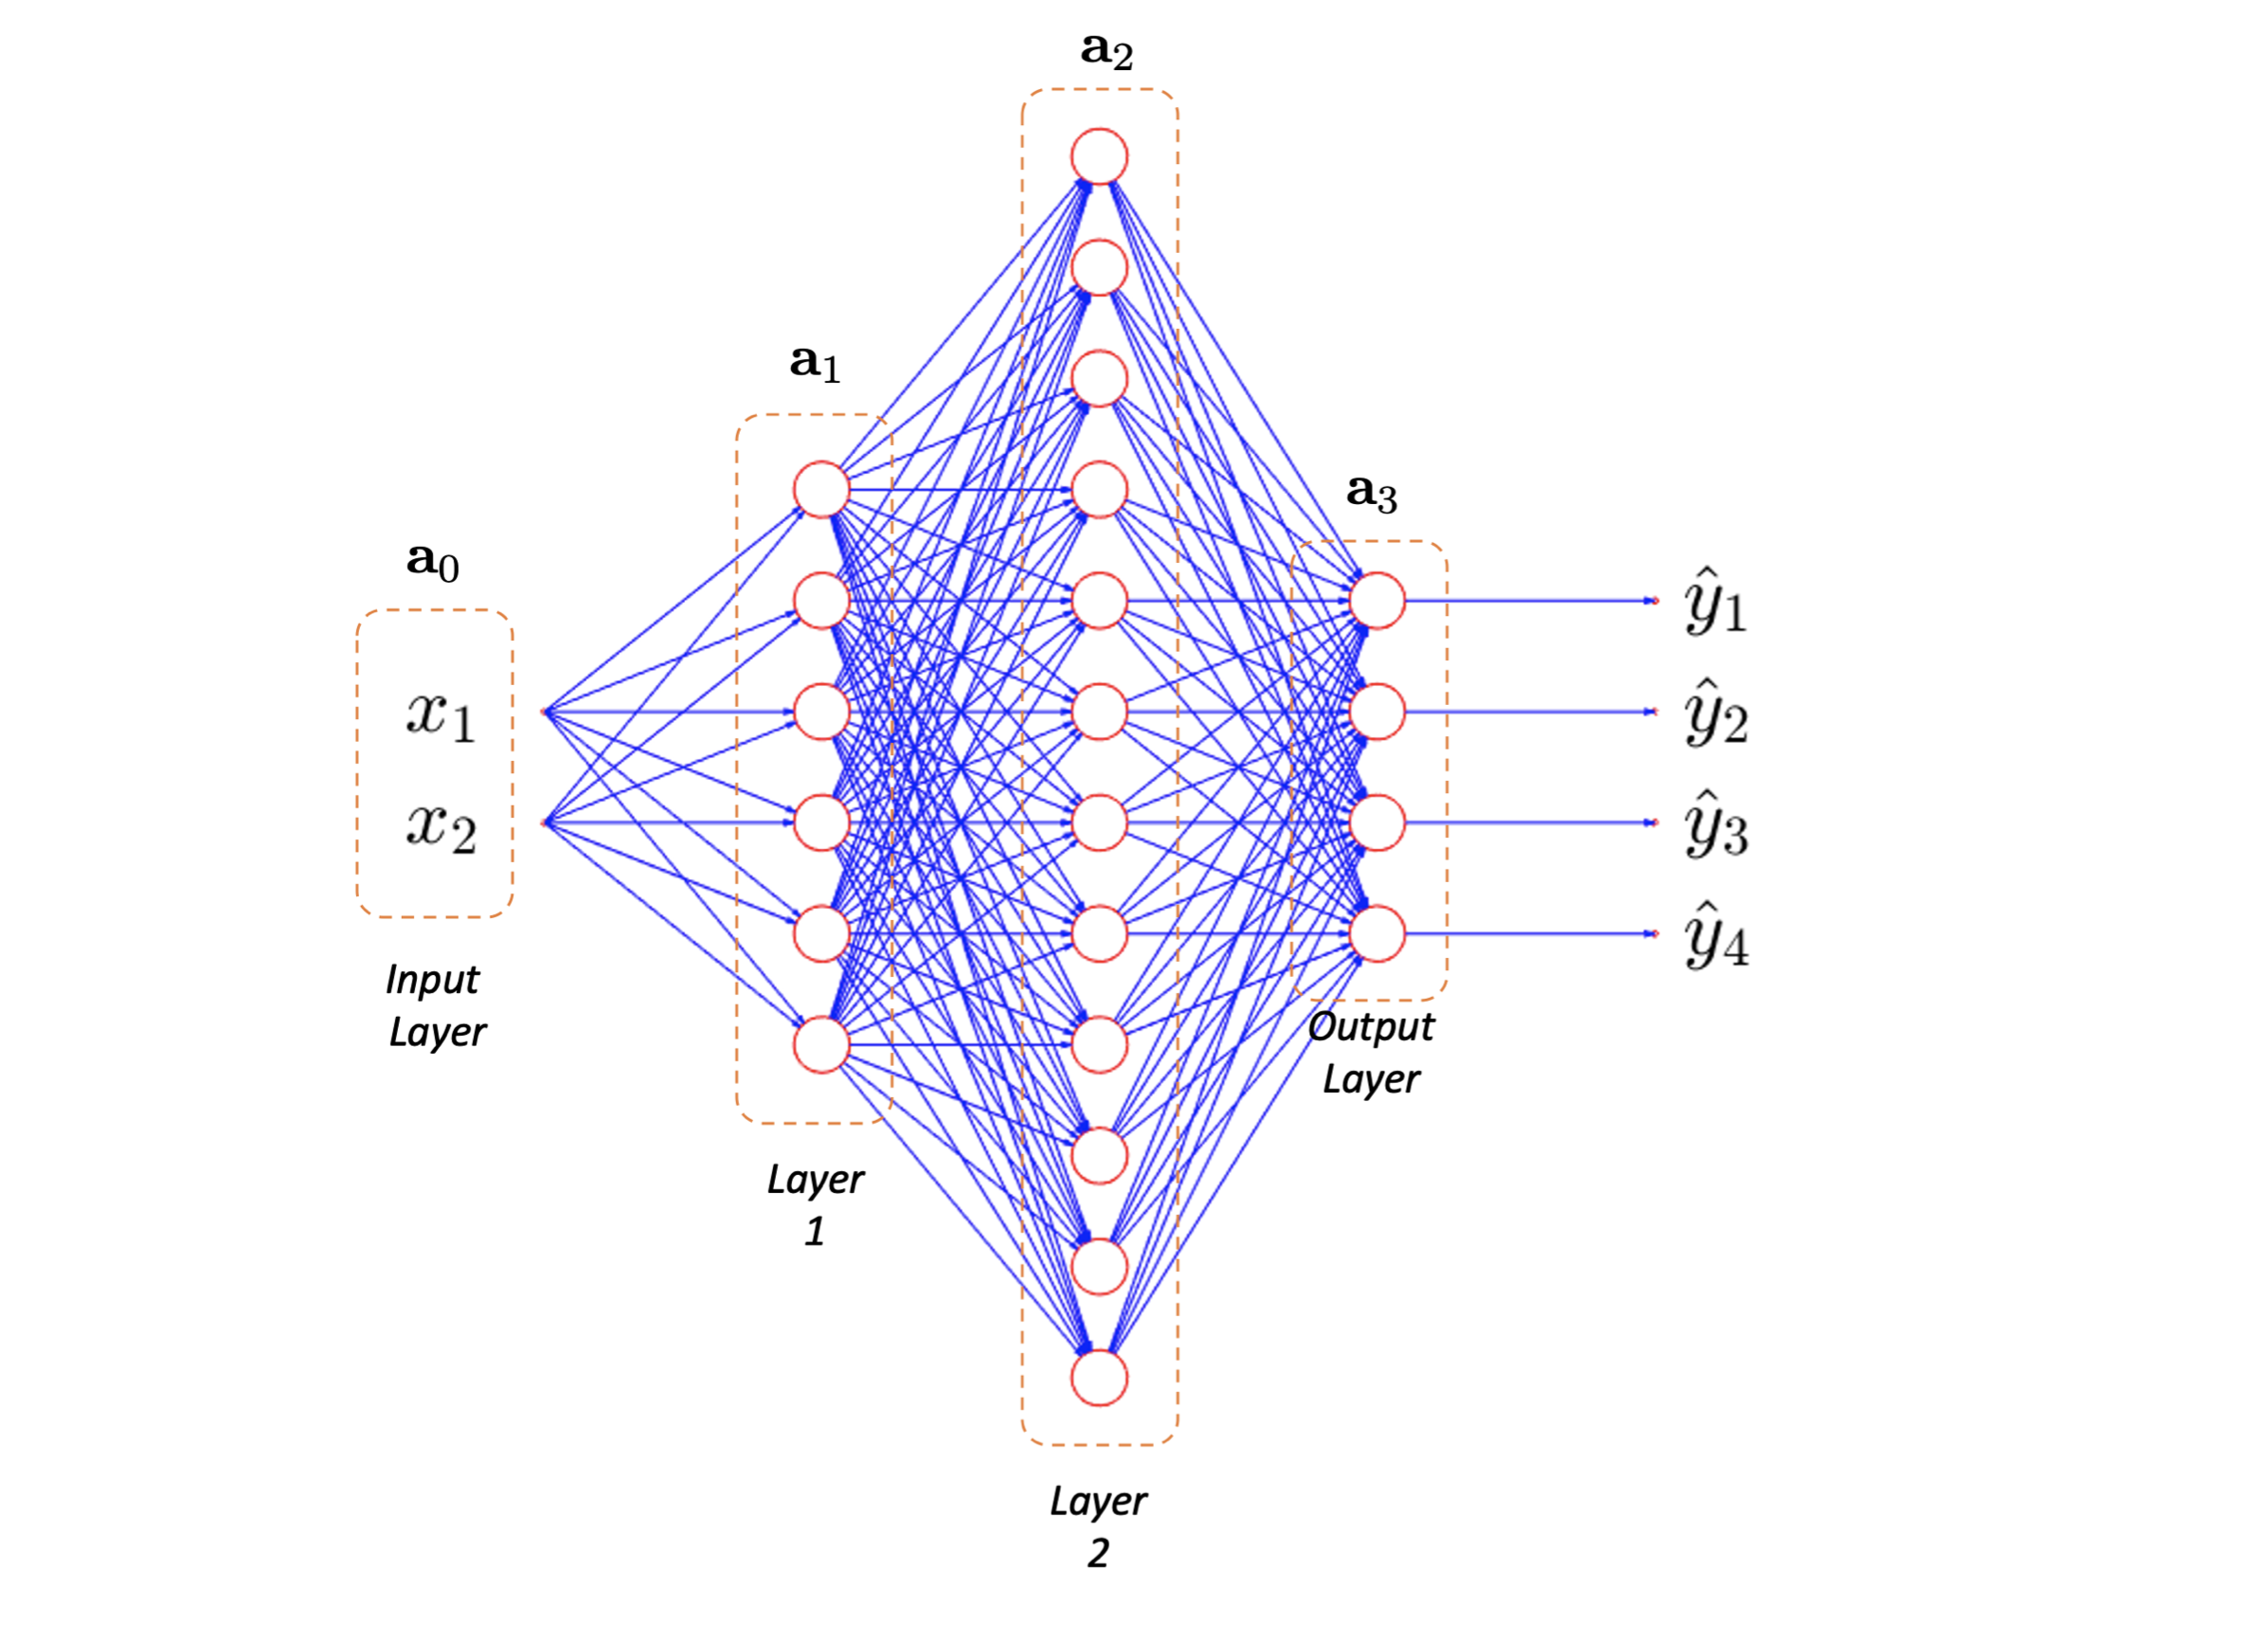

## Redes Neuronales desde cero (from scratch)

Este código se presenta sólo con fines pedagódicos, para entender el funcionamiento de una red neuronal. En la práctica se usa sklearn, como
el ejemplo mostrado en la siguiente sección.

Los pasos para entrenar una red neuronal se pueden resumir en los siguientes 5 pasos:

1) Los parámetros ${\bf \theta}_k = ({\bf W}_k$,${\bf b}_k)$, para $k=1, \cdots m$,  se  inicializan con valores aleatorios:

${\bf W}_k := $ random matrix$(n_k \times n_{k-1})$

${\bf b}_k := $ random vector$(n_k \times 1)$.

2) Las salidas de las capas (layers)se calculan prara cada muestra de entrenamiento $i$:

${\bf z}_{k,i} = {\bf W}_k{\bf a}_{{k-1},i} + {\bf b}_k$

${\bf a}_{k,i}= \sigma({\bf z}_{k,i})$.

3) Las derivadas de los parámetros son calculadas:

$\Delta {\bf W}_k = \frac{\partial J}{\partial {\bf W}_k}$

$\Delta {\bf b}_k = \frac{\partial J}{\partial {\bf b}_k}$.


4) Los parámetross son actualizados usando el "learning rate" $\alpha$:

${\bf W}_k := {\bf W}_k -\alpha \Delta {\bf W}_k$


${\bf b}_k := {\bf b}_k -\alpha \Delta {\bf b}_k$.

5) El procedimiento es repetido despe el paso (2) hasta converger:

$J({\bf W}_1,\cdots,{\bf W}_m,{\bf b}_1,\cdots,{\bf b}_m) < \epsilon$



In [5]:
# Definición de Redes Neuoronales "from Scratch"
# (solo con fines pedagógicos, en la práctica se usa sklearn, como
# el ejemplo mostrado en la siguiente sección)

def nn_definition(n,N):
    W  = [None]
    b  = [None]
    m1 = len(n)
    for k in range(1,m1):
        W    = W  + [np.random.rand(n[k],n[k-1])]
        b    = b  + [np.random.rand(n[k],1)]
    return W,b

def nn_forward_propagation(X,W,b):
    a = [None]
    a[0]  = X
    m1 = len(W)
    for k in range(1,m1):
        zk = W[k].dot(a[k-1])+b[k]
        a = a + [1/(1+np.exp(-zk))]
    return a

def nn_backward_propagation(Y,a,W,b):
    m = len(W)-1
    N = Y.shape[1]
    dam = a[m]-Y
    dW = [None]
    db = [None]

    # Derivatives
    for k in range(1,m+1):
        dW   = dW + [np.zeros([W[k].shape[0],W[k].shape[1]])]
        db   = db + [np.zeros([b[k].shape[0],1])]
    for k in range(m,0,-1):
        if k == m:
            dak = dam
        ds    = np.multiply(a[k], 1-a[k]) 
        Gk    = np.multiply(dak,ds)
        dW[k] = np.matmul(Gk,a[k-1].transpose())/N
        db[k] = (np.sum(Gk,axis=1,keepdims=True))/N 
        dak   = np.matmul(W[k].transpose(),Gk)
    
    return dW,db

def nn_parameters_update(W,b,dW,db,alpha):
    m1 = len(W)

    # Updates
    for k in range(1,m1):
        b[k] = b[k] - alpha*db[k]
        W[k] = W[k] - alpha*dW[k]

    return W,b

def nn_loss_function(a,Y):
    m = len(a)-1
    N = Y.shape[1]
    Ys = a[m]
    dam = Ys-Y
    d2 = np.multiply(dam,dam)
    ds = np.sqrt(np.sum(d2,axis=0,keepdims=True))/N
    loss = np.sum(ds)
    return loss

# Conversion of labels: class <-> hot
# yclass : vector nx1 with m classes
# yhot   : matrix mxn where yhot(i,j)=c if y(j)==i 

def class2hot(yclass):
  ymin = (np.min(yclass)).astype(int)
  ymax = (np.max(yclass)).astype(int)
  y = (yclass - ymin).astype(int)
  m = ymax-ymin+1
  n = y.shape[0]
  yhot = np.zeros((m,n))
  for i in range(n):
    yhot[y[i],i] = 1
  return yhot

def hot2class(yhot):
  yclass  = np.argmax(yhot,axis = 0)
  return yclass

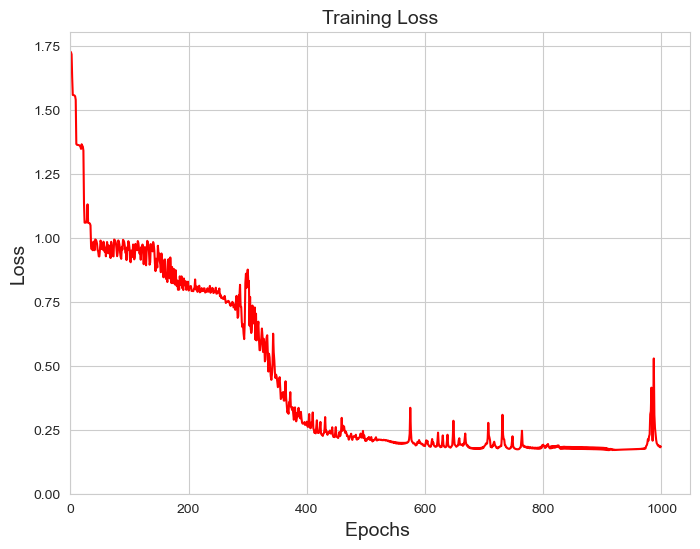

Training:
Confusion Matrix:
[[188   8   0   4]
 [  7 184   7   2]
 [  0   5 179  16]
 [  5   0   9 186]]
Accuracy = 92.12


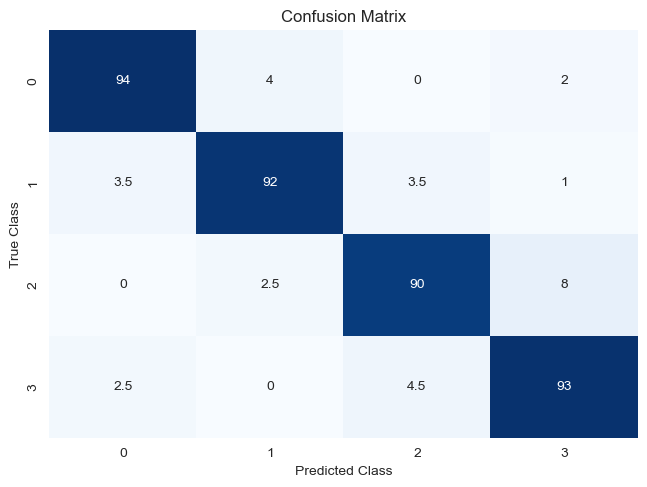

Testing:
Confusion Matrix:
[[93  2  0  5]
 [ 6 90  4  0]
 [ 0  6 88  6]
 [ 2  0  4 94]]
Accuracy = 91.25


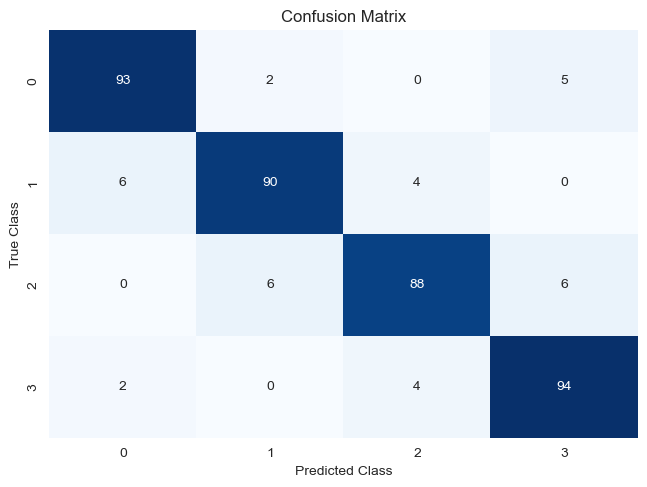

In [6]:
# Entrenamiento de una Red Neuoronal "from Scratch"
# (solo con fines pedagógicos, en la práctica se usa sklearn, como
# el ejemplo mostrado en la siguiente sección)


# Conversión de datos
Ytrain      = class2hot(ytrain)
Ytest       = class2hot(ytest)
XtrainT     = np.transpose(Xtrain)
XtestT      = np.transpose(Xtest)

# Definiciones
N           = XtrainT.shape[1]   # training samples
n_0         = XtrainT.shape[0]   # number of inputs (X)
n_m         = Ytrain.shape[0]    # number of outputs (Y)
tmax        = 1000               # max number of iterations
alpha       = 10                 # learning rate
loss_eps    = 0.01               # stop if loss<loss_eps
nh          = [6,12]             # nodes of hidden layers
n           = [n_0]+nh+[n_m]     # nodes of each layer
m           = len(n)-1
ltrain      = np.zeros([tmax,1]) # training loss

# Training
t     = -1
train =  1
W,b   = nn_definition(n,N)                            # (step 1)
while train:
    t         = t+1
    a         = nn_forward_propagation(XtrainT,W,b)   # (step 2)
    dW,db     = nn_backward_propagation(Ytrain,a,W,b) # (step 3)
    W,b       = nn_parameters_update(W,b,dW,db,alpha) # (step 4)
    ltrain[t] = nn_loss_function(a,Ytrain)            # (step 5)
    train     = ltrain[t]>=loss_eps and t<tmax-1

# Loss function on training and validation subsets
plot_loss(ltrain)

# Evaluation on training subset 
print('Training:')
a = nn_forward_propagation(XtrainT,W,b)    # output layer is a[m]
y0 = hot2class(a[m])+np.min(ytrain)
print_confusion(ytrain,y0,show_heatmap=1,Cnorm=2)
    
# Evaluation on testing subset 
print('Testing:')
a = nn_forward_propagation(XtestT,W,b)     # output layer is a[m]
ypred = hot2class(a[m])+np.min(ytest)
print_confusion(ytest,ypred,show_heatmap=1,Cnorm=1)


## Redes Neuronales (sklearn)

En la práctica se usa esta implementación de Redes Neuoronales

Training:
Confusion Matrix:
[[189   7   0   4]
 [  6 187   6   1]
 [  1   5 184  10]
 [  4   2  11 183]]
Accuracy = 92.88
Testing:
Confusion Matrix:
[[95  2  0  3]
 [ 6 90  4  0]
 [ 0  7 89  4]
 [ 1  1  4 94]]
Accuracy = 92.00


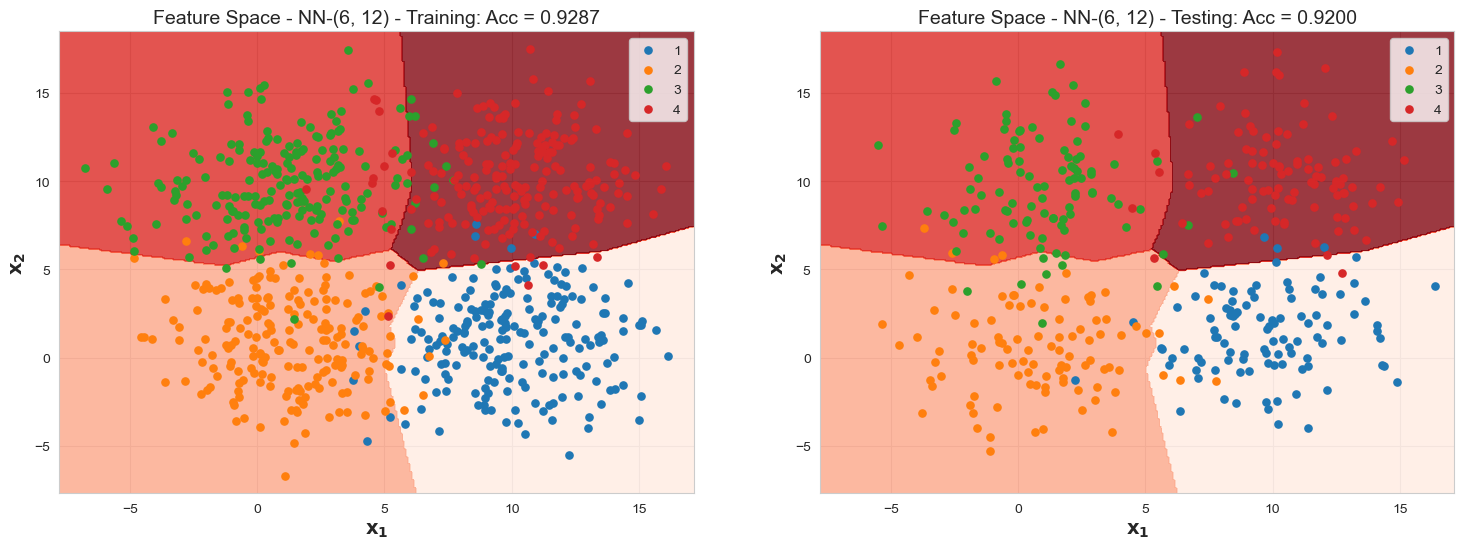

In [7]:
from sklearn.neural_network import MLPClassifier

# Definitions
alpha       = 1e-5     # learning rate
nh          = (6,12)   # nodes of hidden layers
tmax        = 2000     # max number of iterations
solver      = 'adam'   # optimization approach ('lbfgs','sgd', 'adam') 
nn_st       = 'NN-'+str(nh)

# Training
clf = MLPClassifier(solver=solver, alpha=alpha,hidden_layer_sizes=nh, 
                    random_state=1,max_iter=tmax)
clf.fit(Xtrain, ytrain)

# Evaluation on training subset 
y0  = clf.predict(Xtrain)
    
# Evaluation on testing subset 
ypred  = clf.predict(Xtest)

# Display results 
show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,nn_st,decisionline=1)



**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).